In [3]:
import pandas as pd, seaborn as sb, matplotlib.pyplot as plt

In [4]:
import subprocess, sys, os, pathlib

In [5]:
seq_dataset = pd.read_excel('ProbeSet.xlsx',index_col=0)
seqs = [''.join(i.split(' ')).upper() for i in [ii for ii in seq_dataset['Sequences']]]

In [6]:
ViennaRNA_path = r"C:\Users\Mo\Dropbox\notes\Bioinformatics\Aptagen\RNAFoldApp_script\Vienna_RNA"

<b> RNAcofold

In [156]:
command_line = ViennaRNA_path + "\RNAcofold.exe -p < t.seq"

In [157]:
def coFoldEnergy(seq1, seq2):
    with open('t.seq','w') as file_seq:
        file_seq.write(seq1+'&'+seq2)
    with open("test.txt", 'w') as f:
        subprocess.check_call(command_line, shell=True, stdout=f, stderr=f, stdin=f)
    with open("test.txt", 'r') as fh:
        fh.seek(4);
        last = fh.readlines()[-1]
        energy = float(last.split('=')[-1].split('\n')[0])
    return energy

# 2. To be used by all functions to generate heatmap
def ClusterDF(seqs, energy_func):
    energy_df = pd.DataFrame(columns=range(len(seqs)), index=range(len(seqs))) ; print('Scale',energy_df.shape)
    for i in range(len(seqs)):
        for ii in range(i,len(seqs)):
                energy_df.iloc[i,ii] = energy_func(seqs[i],seqs[ii])
    energy_df.update(energy_df.transpose())
    return energy_df.astype('float')

In [158]:
def CustomHeatmap(energy_df):
    fig, ax = plt.subplots(figsize = (7,5)); ax.set_title('Primary Probe Intermolecular Interaction Energy', pad = 3)
    heatmap = sb.heatmap(energy_df, ax = ax)
    plt.ylabel('Sequence ID', rotation = 80); plt.xlabel('Sequence ID',rotation = 20)

In [ ]:
coFoldEnergy

In [159]:
energy_df = ClusterDF(seqs, coFoldEnergy)

Scale (37, 37)


Text(0.5, 24.0, 'Sequence ID')

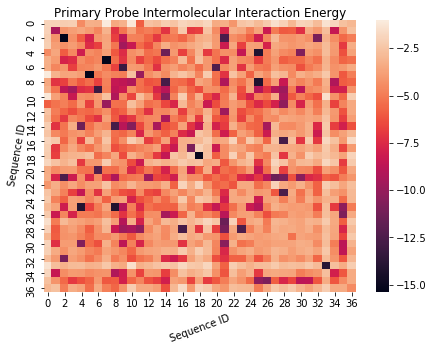

In [67]:
CustomHeatmap(energy_df)

With Concentration

In [63]:
command_line = ViennaRNA_path + "\RNAcofold.exe -p -c < t.seq"

In [68]:
def coFoldEnergy(seq1, seq2, conc = []):
    with open('t.seq','w') as file_seq:
        file_seq.write(seq1+'&'+seq2+'\n')
        file_seq.write(str(conc[0])+' '+str(conc[1]))
    with open("coFoldc.txt", 'w') as f:
        subprocess.check_call(command_line, shell=True, stdout=f, stderr=f, stdin=f)
    with open("coFoldc.txt", 'r') as fh:
        while True:
            line = fh.readline();
            if line.startswith('-'):
                return float(line.split('\t')[0])

In [69]:
coFoldEnergy('AGGACCAGAT', 'ACCCAGAGATAGATA', [1e-6,1e-5])

-2.359435

<b>RNAduplex

In [234]:
command_line = ViennaRNA_path + "\RNAduplex.exe < t.seq"

def duplexEnergy(seq1, seq2):
    with open('t.seq','w') as file_seq:
        file_seq.write(seq1+'\n'+seq2)
    with open("duplex.txt", 'w') as f:
        subprocess.check_call(command_line, shell=True, stdout=f, stderr=f, stdin=f)
    with open('duplex.txt','r') as fh:
        energy = float(fh.readline().split(' ')[-1].split('(')[-1].split(')')[0])
    return energy

In [235]:
duplexEnergy(seqs[0], seqs[5])

-20.2

In [102]:
energy_df2 = ClusterDF(seqs, duplexEnergy)

Scale (37, 37)


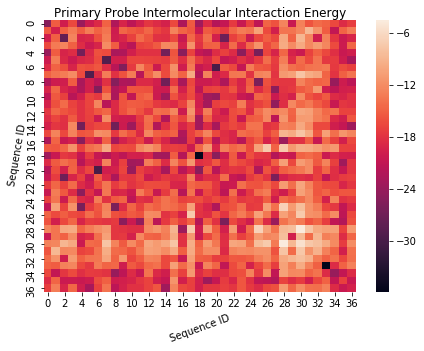

In [105]:
CustomHeatmap(energy_df2)

<b> RNAup - duplex with Intra-energies considerations

In [246]:
command_line = ViennaRNA_path + "\RNAup.exe -b < t.seq"

def duplexEnergy_Up(seq1, seq2):
    with open('t.seq','w') as file_seq:
        file_seq.write(seq1+'&'+seq2)
    with open("duplexUp.txt", 'w') as f:
        subprocess.check_call(command_line, shell=True, stdout=f, stderr=f, stdin=f)
    with open('duplexUp.txt','r') as fh:
        energy = float(fh.readline().split('=')[0].split(':')[-1].split('(')[-1])
    return energy

In [247]:
duplexEnergy_Up(seqs[0], seqs[24])

-1.78

In [248]:
energy_df2 = ClusterDF(seqs, duplexEnergy_Up)

Scale (37, 37)


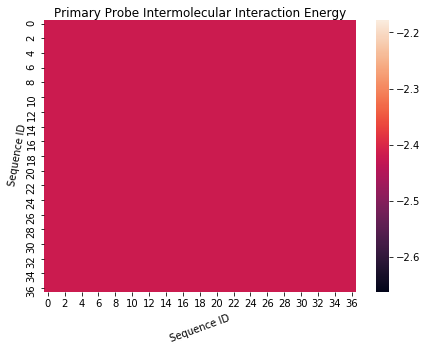

In [203]:
CustomHeatmap(energy_df2)